# Autoencoders and regularization

In [1]:
%matplotlib inline

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import argparse
import sys

from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tf_utils import FullyConnectedLayer, FeedForwardNet
from vis_utils import tilePatches

# Data handler included in TF examples (downloads data)
mnist = input_data.read_data_sets('../data/mnist', one_hot=True)

/usr/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Extracting ../data/mnist/train-images-idx3-ubyte.gz
Extracting ../data/mnist/train-labels-idx1-ubyte.gz
Extracting ../data/mnist/t10k-images-idx3-ubyte.gz
Extracting ../data/mnist/t10k-labels-idx1-ubyte.gz


## Create Autoencoder

In [2]:
n_hid = 256
encoder_net = FeedForwardNet()
encoder_net.addLayer(FullyConnectedLayer((784, n_hid), 'tanh'))

decoder_net = FeedForwardNet()
decoder_net.addLayer(FullyConnectedLayer((n_hid, 784), 'identity'))

x = tf.placeholder(tf.float32, [None, 784])
x_enc = encoder_net.forward(x)
y_dec = decoder_net.forward(x_enc)
x_dec = tf.nn.sigmoid(y_dec)

## Weight decay using L2 norm regularization.
This particular form of regularization has the effect of shrinking the weights proportinal to their magnitude. Therefore, weigh values become smaller, but o not necessarily vanish.

In [3]:
# Add L2 penalty to the encoder and decoder weight matrices
encoder_reg = tf.reduce_mean(tf.square(encoder_net.layers[0].params['W']))
decoder_reg = tf.reduce_mean(tf.square(decoder_net.layers[-1].params['W']))

rec_cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=x, logits=y_dec))
reg_term = encoder_reg + decoder_reg
reg_tradeoff = 0.1

reg_cost = rec_cost + reg_tradeoff * reg_term

In [4]:
train_step = tf.train.MomentumOptimizer(0.5, 0.9).minimize(reg_cost)

sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

In [5]:
n_iter = 80000
for i in range(n_iter):
    batch_xs, _ = mnist.train.next_batch(100)
    ## display training accuracy 
    if i%(n_iter/10) == 0:
        train_cost = reg_cost.eval(feed_dict={
        x:batch_xs})
        print("step %d, training cost %g"%(i, train_cost))
    ## 
    sess.run(train_step, feed_dict={x: batch_xs})

step 0, training cost 0.88159
step 8000, training cost 0.0748536
step 16000, training cost 0.0720272
step 24000, training cost 0.0710429
step 32000, training cost 0.0654655
step 40000, training cost 0.066239
step 48000, training cost 0.0675421
step 56000, training cost 0.0677201
step 64000, training cost 0.0661409
step 72000, training cost 0.0677537


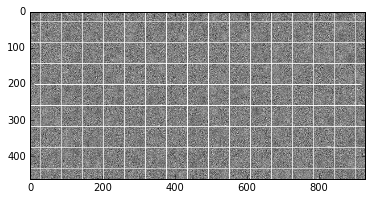

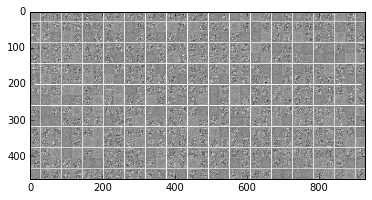

In [6]:
# visualize the encoder filters
W_enc = encoder_net.layers[0].params['W'].eval()
enc_filters = tilePatches(np.reshape(W_enc, [28, 28, -1]), ncol=16)
plt.imshow(enc_filters[:,:,0], cmap='gray')
plt.show()
# visualize the decoder filters
W_dec = decoder_net.layers[0].params['W'].eval()
dec_filters = tilePatches(np.reshape(W_dec.transpose(), [28, 28, -1]), ncol=16)
plt.imshow(dec_filters[:,:,0], cmap='gray')
plt.show()

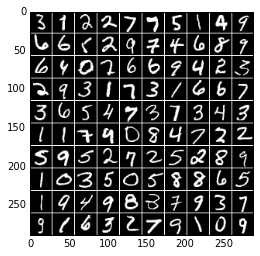

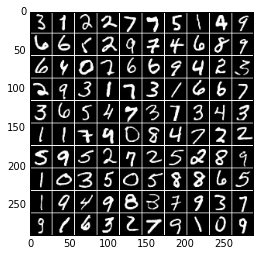

In [7]:
# visualize reconstructions
batch_rec = sess.run(x_dec, feed_dict={x:batch_xs})
tiled_batch_xs = tilePatches(np.reshape(batch_xs.transpose(), [28, 28, -1]), ncol=10)
tiled_batch_rec = tilePatches(np.reshape(batch_rec.transpose(), [28, 28, -1]), ncol=10)
plt.imshow(tiled_batch_xs[:,:,0], cmap='gray')
plt.show()
plt.imshow(tiled_batch_rec[:,:,0], cmap='gray')
plt.show()

## Sparsity enforcing constraint L1
This form of regularization is applied to the hidden activations rether than the encoder and decoder weights

In [8]:
code_reg = tf.reduce_mean(tf.abs(x_enc))

reg_term = code_reg + reg_cost
reg_tradeoff = 0.1

reg_cost = rec_cost + reg_tradeoff * reg_term

In [9]:
train_step = tf.train.MomentumOptimizer(0.5, 0.9).minimize(reg_cost)

sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

In [10]:
n_iter = 80000
for i in range(n_iter):
    batch_xs, _ = mnist.train.next_batch(100)
    ## display training accuracy 
    if i%(n_iter/10) == 0:
        train_cost = reg_cost.eval(feed_dict={
        x:batch_xs})
        print("step %d, training cost %g"%(i, train_cost))
    ## 
    sess.run(train_step, feed_dict={x: batch_xs})

step 0, training cost 1.00714
step 8000, training cost 0.117553
step 16000, training cost 0.104506
step 24000, training cost 0.102742
step 32000, training cost 0.0937091
step 40000, training cost 0.0913443
step 48000, training cost 0.0946775
step 56000, training cost 0.0922278
step 64000, training cost 0.088555
step 72000, training cost 0.0860642


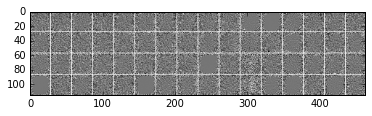

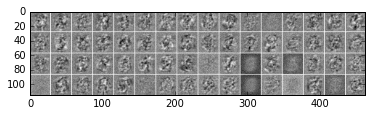

In [19]:
# visualize the encoder filters
W_enc = encoder_net.layers[0].params['W'].eval()
enc_filters = tilePatches(np.reshape(W_enc, [28, 28, -1]), ncol=16)
plt.imshow(enc_filters[:,:,0], cmap='gray')
plt.show()
# visualize the decoder filters
W_dec = decoder_net.layers[0].params['W'].eval()
dec_filters = tilePatches(np.reshape(W_dec.transpose(), [28, 28, -1]), ncol=16)
plt.imshow(dec_filters[:,:,0], cmap='gray')
plt.show()

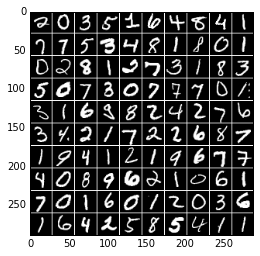

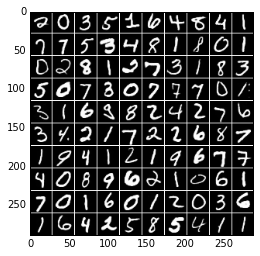

In [12]:
# visualize reconstructions
batch_rec = sess.run(x_dec, feed_dict={x:batch_xs})
tiled_batch_xs = tilePatches(np.reshape(batch_xs.transpose(), [28, 28, -1]), ncol=10)
tiled_batch_rec = tilePatches(np.reshape(batch_rec.transpose(), [28, 28, -1]), ncol=10)
plt.imshow(tiled_batch_xs[:,:,0], cmap='gray')
plt.show()
plt.imshow(tiled_batch_rec[:,:,0], cmap='gray')
plt.show()